In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.ndimage
#from PIL import Image
from skimage import data, color
from skimage.transform import resize
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
# Load the dataset and create arrays of Green's functions.
sample=64
time_end=1000 # max real-time
time=502

rescaled_g_ret_im = np.array([])
file_Gloc=pd.read_csv("Gloc.out",sep = " ",header = None,names=range(5),skiprows=1)

file_Gloc_ret_data=file_Gloc[(file_Gloc[0] == 'ret:')]
file_Gloc_ret_data.columns = ['name','time_1','time_2','Re_G_ret','Im_G_ret']
file_Gloc_ret_data.index = pd.RangeIndex(0,0 + len(file_Gloc_ret_data)) # start index from 0

file_Gloc_les_data=file_Gloc[(file_Gloc[0] == 'les:')]
file_Gloc_les_data.columns = ['name','time_1','time_2','Re_G_les','Im_G_les']
file_Gloc_les_data.index = pd.RangeIndex(0,0 + len(file_Gloc_les_data))

file_Gloc_tv_full_data=file_Gloc[(file_Gloc[0] == 'tv:')] # G_tv(t,tau)
file_Gloc_tv_full_data.columns = ['name','time_1','time_2','Re_G_tv','Im_G_tv']
file_Gloc_tv_full_data.index = pd.RangeIndex(0,0 + len(file_Gloc_tv_full_data))

while time <= time_end:
  
  file_Gloc_ret=file_Gloc_ret_data[file_Gloc_ret_data['time_1'] <= time] # take data less and equal than 'time'
  file_Gloc_les=file_Gloc_les_data[file_Gloc_les_data['time_2'] <= time]
  file_Gloc_tv_full=file_Gloc_tv_full_data[(file_Gloc_tv_full_data['time_1'] <= time)]

#  Make squared dataset of G_loc_ret by mirror existing triangle data Gret
# 1.1 Create mirror triangle data G_loc_ret 
  c = file_Gloc_ret.columns
  file_Gloc_ret_mirror = file_Gloc_ret.copy()
  file_Gloc_ret_mirror[[c[1], c[2]]] = file_Gloc_ret[[c[2], c[1]]] # mirror array by exchanging time_1 and time_2 

# 1.2 Create mirror triangle data G_loc_les 
  c = file_Gloc_les.columns
  file_Gloc_les_mirror = file_Gloc_les.copy()
  file_Gloc_les_mirror[[c[1], c[2]]] = file_Gloc_les[[c[2], c[1]]]

# 2.1 Delete double-counting from mirror triangle data (diagonal G_ret)
  index_Gret_double_count=file_Gloc_ret_mirror[(file_Gloc_ret_mirror['time_1'] == file_Gloc_ret_mirror['time_2'])].index
  file_Gloc_ret_mirror=file_Gloc_ret_mirror.drop(file_Gloc_ret_mirror.index[index_Gret_double_count])

# 2.2 Delete double-counting from mirror triangle data (diagonal G_les)
  index_Gles_double_count=file_Gloc_les_mirror[(file_Gloc_les_mirror['time_1'] == file_Gloc_les_mirror['time_2'])].index
  file_Gloc_les_mirror=file_Gloc_les_mirror.drop(file_Gloc_les_mirror.index[index_Gles_double_count])


# Gret square array
  file_Gloc_ret_array_o=file_Gloc_ret.to_numpy()
  file_Gloc_ret_array_m=file_Gloc_ret_mirror.to_numpy()
  g_ret = np.zeros((time+1, time+1), dtype=complex)
#print(gf)

  for row in file_Gloc_ret_array_o:
    i, j = int(row[1]), int(row[2])
    g_ret[i, j] = float(row[3]) + 1j * float(row[4])
   
  for row in file_Gloc_ret_array_m:
    i, j = int(row[1]), int(row[2])
    g_ret[i, j] = float(row[3]) + 1j * float(row[4])
    
  file_Gloc_les_array_o=file_Gloc_les.to_numpy()
  file_Gloc_les_array_m=file_Gloc_les_mirror.to_numpy()
  g_les = np.zeros((time+1, time+1), dtype=complex)
#print(gf)

  for row in file_Gloc_les_array_o:
    i, j = int(row[1]), int(row[2])
    g_les[i, j] = float(row[3]) + 1j * float(row[4])
   
  for row in file_Gloc_les_array_m:
    i, j = int(row[1]), int(row[2])
    g_les[i, j] = float(row[3]) + 1j * float(row[4])

#Compress (sample*sample)  
  image_g_ret_im = color.rgb2gray(g_ret.imag)
  rescaled_g_ret_im=np.append(rescaled_g_ret_im,[resize(image_g_ret_im, (sample, sample))]) 
  #rescaled_g_ret_im=np.add(rescaled_g_ret_im,[resize(image_g_ret_im, (sample, sample))]) 
  #rescaled_g_ret_im = np.concatenate(rescaled_g_ret_im,[resize(image_g_ret_im, (sample, sample))])
  #rescaled_g_ret_im = np.vstack((rescaled_g_ret_im, resize(image_g_ret_im, (sample, sample))))
  print(len(rescaled_g_ret_im))

  time += 10
  #print(len(rescaled_g_ret_im)/(sample*sample))
np.save('data_2.npy', rescaled_g_ret_im)
print(len(rescaled_g_ret_im)/(sample*sample))

4096
8192
12288
16384
20480
24576
28672
32768
36864
40960
45056
49152
53248
57344
61440
65536
69632
73728
77824
81920
86016
90112
94208
98304
102400
106496
110592
114688
118784
122880
126976
131072
135168
139264
143360
147456
151552
155648
159744
163840
167936
172032
176128
180224
184320
188416
192512
196608
200704
204800
50.0


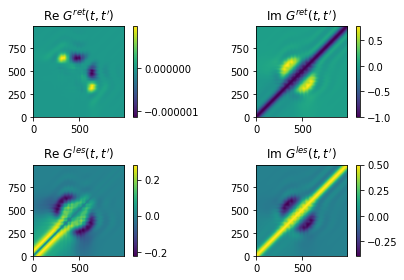

In [4]:
#Plot
fig = plt.figure()

plt.subplot(2, 2, 1)
plt.imshow(g_ret.real,origin = 'lower',cmap = 'viridis')
cb=plt.colorbar()
plt.title("Re $G^{ret}(t, t')$")

plt.subplot(2, 2, 2)
plt.imshow(g_ret.imag,origin = 'lower',cmap = 'viridis')
cb=plt.colorbar()
plt.title("Im $G^{ret}(t, t')$")

plt.subplot(2, 2, 3)
plt.imshow(g_les.real,origin = 'lower',cmap = 'viridis')
cb=plt.colorbar()
plt.title("Re $G^{les}(t, t')$")

plt.subplot(2, 2, 4)
plt.imshow(g_les.imag,origin = 'lower',cmap = 'viridis')
cb=plt.colorbar()
plt.title("Im $G^{les}(t, t')$")

fig.tight_layout()
plt.show()

image_original shape = (993, 993)
image_rescaled shape = (64, 64)


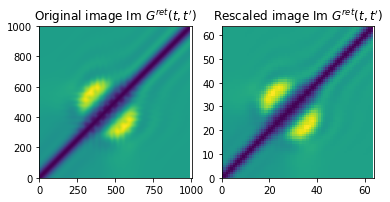

In [5]:
image_g_ret_im = color.rgb2gray(g_ret.imag)
sample=64
rescaled_g_ret_im=resize(image_g_ret_im, (sample, sample))#.shape
#print(image_rescaled)
print("image_original shape =",image_g_ret_im.shape)
print("image_rescaled shape =",rescaled_g_ret_im.shape)
fig, axes = plt.subplots(nrows=1, ncols=2)

ax = axes.ravel()
ax[0].imshow(image_g_ret_im)
ax[0].set_title("Original image Im $G^{ret}(t, t')$")
ax[1].imshow(rescaled_g_ret_im)
ax[1].set_title("Rescaled image Im $G^{ret}(t, t')$")
ax[0].set_xlim(0, time)
ax[0].set_ylim(0, time)
ax[1].set_xlim(0, sample)
ax[1].set_ylim(0, sample)
plt.show()